In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage import data, img_as_float
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import skimage.morphology as morpho
from skimage.measure import label, regionprops, regionprops_table
import skimage.measure as measure
import pandas as pd
from tabulate import tabulate
from sklearn.metrics.pairwise import euclidean_distances
from tqdm import tqdm 
from tabulate import tabulate
from time import sleep

In [2]:
#usefull function for morfological applications
def strel(forme,taille,angle=45):
    if forme == 'diamond':
        return morpho.selem.diamond(taille)
    if forme == 'disk':
        return morpho.selem.disk(taille)
    if forme == 'square':
        return morpho.selem.square(taille)
    if forme == 'line':
        angle=int(-np.round(angle))
        angle=angle%180
        angle=np.float32(angle)/180.0*np.pi
        x=int(np.round(np.cos(angle)*taille))
        y=int(np.round(np.sin(angle)*taille))
        if x**2+y**2 == 0:
            if abs(np.cos(angle))>abs(np.sin(angle)):
                x=int(np.sign(np.cos(angle)))
                y=0
            else:
                y=int(np.sign(np.sin(angle)))
                x=0
        rr,cc=morpho.selem.draw.line(0,0,y,x)
        rr=rr-rr.min()
        cc=cc-cc.min()
        img=np.zeros((rr.max()+1,cc.max()+1) )
        img[rr,cc]=1
        return img
    raise RuntimeError('Error, not understandable form')
def couleurs_alea(im):
    sh=im.shape
    out=np.zeros((sh[0],sh[1],3),dtype=np.uint8)
    nbcoul=np.int32(im.max())
    tabcoul=np.random.randint(0,256,size=(nbcoul+1,3))
    tabcoul[0,:]=0
    for k in range(sh[0]):
        for l in range(sh[1]):
            out[k,l,:]=tabcoul[im[k,l]]
    return out

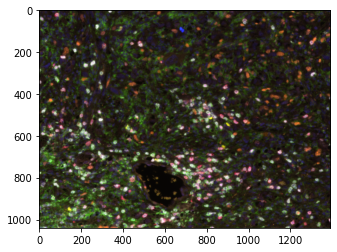

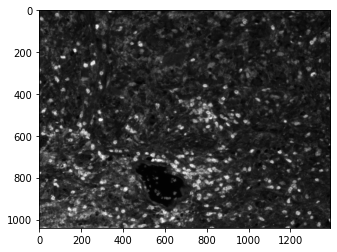

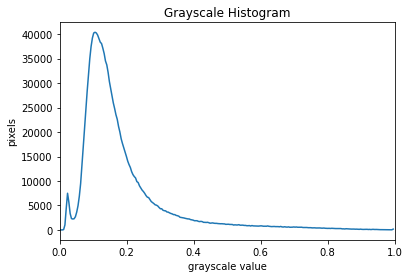

In [3]:
#Plotting the image, and his histogram to understand where to put the threshold to higlight the cells
I = plt.imread('20EN01467_8 PREPARED (1).tif')
plt.imshow(I)
plt.show()

Ig = rgb2gray(I)
plt.imshow(Ig,cmap='gray')
plt.show()

# create a histogram of the grayscale image
histogram, bin_edges = np.histogram(Ig, bins=256, range=(0.0, 1.0))

plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

#Detection

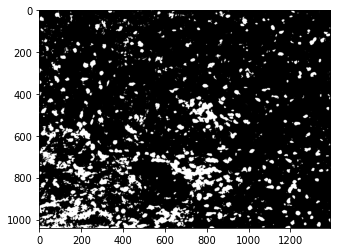

In [4]:
# create a mask based on the threshold for the cells 
t = 0.3
binary_mask = Ig > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.show()

In [5]:
#I gave as input to this function the marker image, a threshold to transform it in binary, 
#structuring element size of opening and erosion and finally, the color i want to use and if i want to plot everything 
def mask(im,th,op,er,color,plot=False):
  i = plt.imread(im)
  if plot==True:
    plt.figure(figsize=(5,5))
    plt.imshow(i)
    plt.title('Original Image '+ im)
    plt.show() 

  gray = rgb2gray(i)
  if plot==True:
    plt.figure(figsize=(5,5))
    plt.imshow(gray,cmap='gray')
    plt.title('Gray '+ im)
    plt.show()


  # create a histogram of the grayscale image
  histogram, bin_edges = np.histogram(gray, bins=256, range=(0.0, 1.0))
  if plot==True:
    plt.figure(figsize=(5,5))
    plt.plot(bin_edges[0:-1], histogram)
    plt.title("Grayscale Histogram")
    plt.xlabel("grayscale value")
    plt.ylabel("pixels")
    plt.xlim(0, 1.0)
    plt.show()

  gray1=gray.copy()
  gray1[gray < th] = 255   # Set all values bigger than th to 0 (black).
  gray1[gray >= th] = 0

  if plot==True:
    plt.figure(figsize=(5,5))
    plt.imshow(gray1,cmap='gray')
    plt.title('Thresholding')
    plt.show()


  gray1 = morpho.opening(gray1,strel('disk',op))
  gray1 = morpho.erosion(gray1,strel('disk',er))

  final=i.copy()
  final[gray1==0]= 0
  final[gray1!=0]= (color) 
  if plot==True:
    plt.imshow(final,cmap='gray')
    plt.title('Final')
    plt.show()
  return final, gray1

Using mask function for all cells activated with the various chemical agents

**CD3_8**

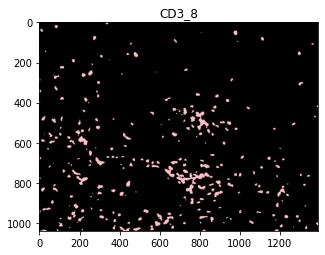

In [6]:
CD3_8, CD3_8gray =mask('20EN01467_8_Opal 690_path_view CD3.tif',0.8,4,2,(255, 192, 203))#pink
plt.figure(figsize=(5,5))
plt.imshow(CD3_8,cmap='gray')
plt.title('CD3_8')
plt.show()

**CD20 _8**

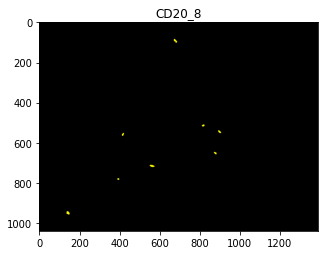

In [7]:
CD20_8,CD20_8gray =mask('20EN01467_8_Opal 520_path_view CD20.tif',0.8,4,2,(255, 255, 0))#yellow
plt.figure(figsize=(5,5))
plt.imshow(CD20_8,cmap='gray')
plt.title('CD20_8')
plt.show()

**KI67_8**

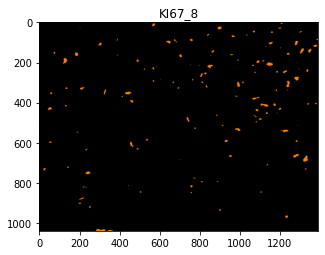

In [8]:
KI67_8,KI67_8gray=mask('20EN01467_8_Opal 570_path_view KI67.tif',0.75,3,2,(255, 128, 0))#orange
plt.figure(figsize=(5,5))
plt.imshow(KI67_8,cmap='gray')
plt.title('KI67_8')
plt.show()

**CD4_8**

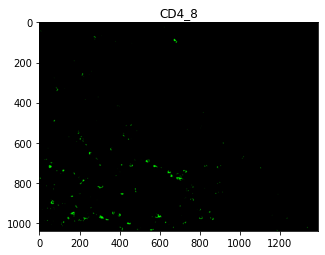

In [9]:
CD4_8,CD4_8gray=mask('20EN01467_8_Opal 540_path_view CD4.tif',0.73,1,1,(0, 255, 0))#green
plt.figure(figsize=(5,5))
plt.imshow(CD4_8,cmap='gray')
plt.title('CD4_8')
plt.show()

**CD8_8**

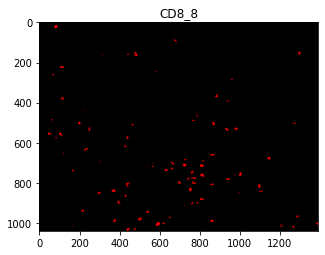

In [10]:
CD8_8,CD8_8gray=mask('20EN01467_8_Opal 620_path_view CD8.tif',0.75,3,2,(255, 0, 0))#red
plt.figure(figsize=(5,5))
plt.imshow(CD8_8,cmap='gray')
plt.title('CD8_8')
plt.show()

**FOXP3_8**

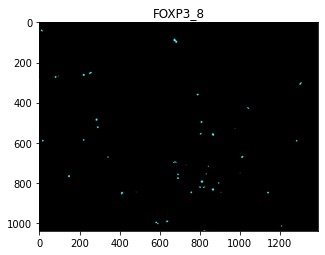

In [11]:
FOXP3_8,FOXP3_8gray=mask('20EN01467_8_Opal 650_path_view FOXP3.tif',0.75,1,0,(53, 255, 255))#light blue
plt.figure(figsize=(5,5))
plt.imshow(FOXP3_8,cmap='gray')
plt.title('FOXP3_8')
plt.show()

#Classification

Combination of the cells that responded to markers to identify the class of the cells.

The strategy was to check the colours present in a certain area for all the various agents used, if the combination of colours in a certain cell was consistent with the classification table I was provided with, the cell was classified into one of six possible types

**Lymphocytes double négatif CD3+ CD4- CD8-**

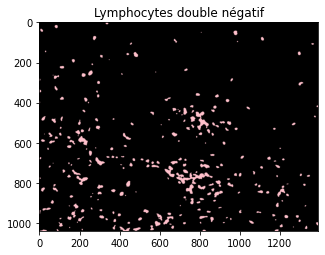

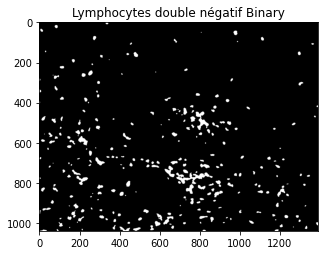

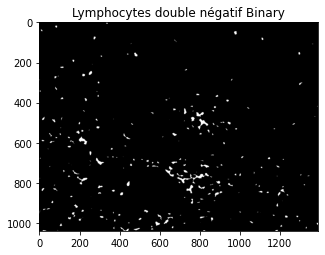

In [12]:
#Note about this case: since many cell were overlapped, i also used only in this cell an erosion to try to divide cells, otherwise during the calculation of the centroid many cells are considered as one.  
plt.rc('figure', figsize=(20, 20))
lydn, lydnbin =I.copy(), I.copy()
N,M,c=lydn.shape
for i in range(0,N):
  for j in range(0,M):
    if (CD3_8[i,j][0]==255 and CD3_8[i,j][1]==  192 and CD3_8[i,j][2]== 203) or (KI67_8[i,j][0]== 255 and KI67_8[i,j][1]== 128 and KI67_8[i,j][2]==0 and CD3_8[i,j][0]==255 and CD3_8[i,j][1]==  192 and CD3_8[i,j][2]== 203) :
      lydn[i,j]=(255, 192, 203)#pink
      lydnbin[i,j]=(255,255,255)
    else: 
      lydn[i,j]=(0,0,0)
      lydnbin[i,j]=(0,0,0)

plt.figure(figsize=(5,5))
plt.imshow(lydn)
plt.title('Lymphocytes double négatif')
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(lydnbin)
plt.title('Lymphocytes double négatif Binary')
plt.show()
plt.figure(figsize=(5,5))
lydnbin= morpho.erosion(rgb2gray(lydnbin),strel('disk',3))
plt.imshow(lydnbin,cmap='gray')
plt.title('Lymphocytes double négatif Binary')
plt.show()

**Lymphocytes auxiliaires CD3+ CD4+**

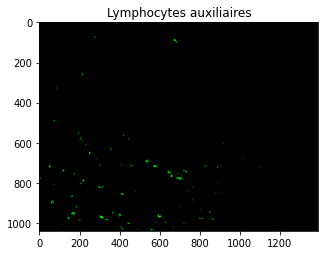

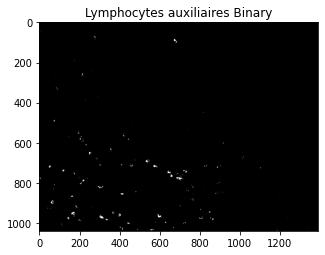

In [13]:
lyau, lyaubin=I.copy(), I.copy()
N,M,c=lyau.shape
for i in range(0,N):
  for j in range(0,M):
    if (CD4_8[i,j][0]== 0 and CD4_8[i,j][1]== 255 and CD4_8[i,j][2]==0 and CD3_8[i,j][0]==255 and CD3_8[i,j][1]==  192 and CD3_8[i,j][2]== 203) or (CD4_8[i,j][0]== 0 and CD4_8[i,j][1]== 255 and CD4_8[i,j][2]==0 and KI67_8[i,j][0]== 255 and KI67_8[i,j][1]== 128 and KI67_8[i,j][2]==0 and CD3_8[i,j][0]==255 and CD3_8[i,j][1]==  192 and CD3_8[i,j][2]== 203) :
      lyau[i,j]=(0, 255, 0) #green
      lyaubin[i,j]=(255,255,255)
    else: 
      lyau[i,j]=(0,0,0)
      lyaubin[i,j]=(0,0,0)

plt.figure(figsize=(5,5))
plt.imshow(lyau)
plt.title('Lymphocytes auxiliaires')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(lyaubin)
plt.title('Lymphocytes auxiliaires Binary')
plt.show()

**Lymphocytes cytotoxiques CD3+ CD8+**

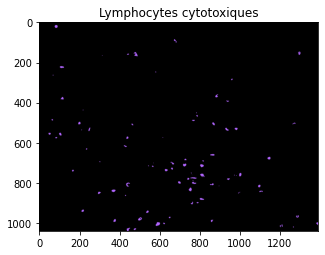

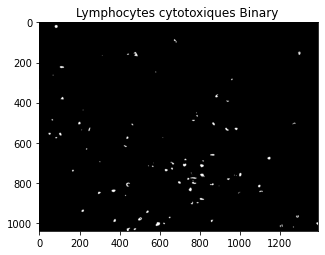

In [14]:
lycy ,lycybin = I.copy(), I.copy()
N,M,c=lycy.shape
for i in range(0,N):
  for j in range(0,M):
    if (CD8_8[i,j][0]== 255 and CD8_8[i,j][1]== 0 and CD8_8[i,j][2]==0 and CD3_8[i,j][0]==255 and CD3_8[i,j][1]==  192 and CD3_8[i,j][2]== 203) or (KI67_8[i,j][0]== 255 and KI67_8[i,j][1]== 128 and KI67_8[i,j][2]==0 and CD3_8[i,j][0]==255 and CD3_8[i,j][1]==  192 and CD3_8[i,j][2]== 203 and  CD8_8[i,j][0]== 255 and CD8_8[i,j][1]== 0 and CD8_8[i,j][2]== 0) :
      lycy[i,j]=(178, 102, 255) #Light purple 
      lycybin[i,j]=(255,255,255)
    else: 
      lycy[i,j]=(0,0,0)
      lycybin[i,j]=(0,0,0)

plt.figure(figsize=(5,5))
plt.imshow(lycy)
plt.title('Lymphocytes cytotoxiques')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(lycybin)
plt.title('Lymphocytes cytotoxiques Binary ')
plt.show()

**Macrophages**

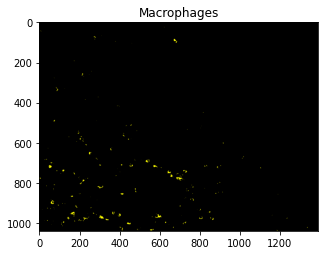

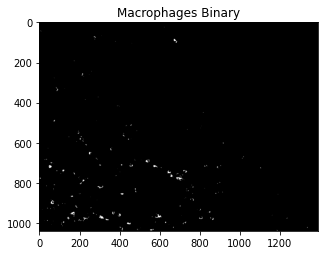

In [15]:
macro, macrobin =I.copy(),I.copy()
N,M,c=macro.shape
for i in range(0,N):
  for j in range(0,M):
    if (CD4_8[i,j][0]== 0 and CD4_8[i,j][1]== 255 and CD4_8[i,j][2]==0 ) or (CD4_8[i,j][0]== 0 and CD4_8[i,j][1]== 255 and CD4_8[i,j][2]==0 and KI67_8[i,j][0]== 255 and KI67_8[i,j][1]== 128 and KI67_8[i,j][2]==0):
      macro[i,j]=(255, 255, 0)#yellow
      macrobin[i,j]=(255, 255,255)
    else: 
      macro[i,j]=(0,0,0)
      macrobin[i,j]=(0,0,0)

plt.figure(figsize=(5,5))
plt.imshow(macro)
plt.title('Macrophages')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(macrobin)
plt.title('Macrophages Binary')
plt.show()

**Lymphocytes B**

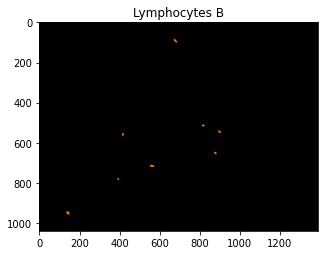

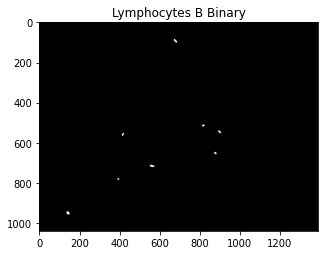

In [16]:
lyB, lyBbin = I.copy(), I.copy()
N,M,c=lyB.shape
for i in range(0,N):
  for j in range(0,M):
    if (CD20_8[i,j][0]== 255 and CD20_8[i,j][1]== 255 and CD20_8[i,j][2]==0 ) or (CD20_8[i,j][0]== 255 and CD20_8[i,j][1]== 255 and CD20_8[i,j][2]==0 and KI67_8[i,j][0]== 255 and KI67_8[i,j][1]== 128 and KI67_8[i,j][2]==0):
      lyB[i,j]=(255, 128, 0)#orange
      lyBbin[i,j]=(255,255,255)
    else: 
      lyB[i,j]=(0,0,0)
      lyBbin[i,j]=(0,0,0)

plt.figure(figsize=(5,5))
plt.imshow(lyB)
plt.title('Lymphocytes B')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(lyBbin)
plt.title('Lymphocytes B Binary')
plt.show()

**Lymphocytes T regulares**

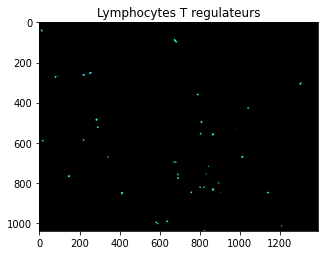

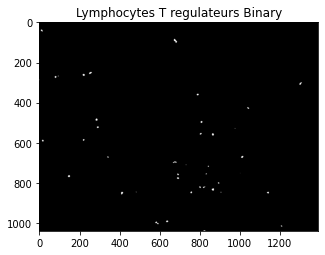

In [17]:
# or (CD3_8[i,j][0]==255 and CD3_8[i,j][1]==  192 and CD3_8[i,j][2]== 203 FOXP3_8[i,j][0]== 53 and FOXP3_8[i,j][1]== 255 and FOXP3_8[i,j][2]== 255 and KI67_8[i,j][0]== 255 and KI67_8[i,j][1]== 128 and KI67_8[i,j][2]==0):
lyT, lyTbin = I.copy(), I.copy()
N,M,c=lyT.shape
for i in range(0,N):
  for j in range(0,M):
    if (CD4_8[i,j][0]== 0 and CD4_8[i,j][1]== 255 and CD4_8[i,j][2]==0 and CD3_8[i,j][0]==255 and CD3_8[i,j][1]==  192 and CD3_8[i,j][2]== 203 and FOXP3_8[i,j][0]== 53 and FOXP3_8[i,j][1]== 255 and FOXP3_8[i,j][2]== 255) or (CD4_8[i,j][0]== 0 and CD4_8[i,j][1]== 255 and CD4_8[i,j][2]==0 and CD3_8[i,j][0]==255 and CD3_8[i,j][1]==  192 and CD3_8[i,j][2]== 203 and FOXP3_8[i,j][0]== 53 and FOXP3_8[i,j][1]== 255 and FOXP3_8[i,j][2]== 255 and KI67_8[i,j][0]== 255 and KI67_8[i,j][1]== 128 and KI67_8[i,j][2]==0) or (CD3_8[i,j][0]==255 and CD3_8[i,j][1]==  192 and CD3_8[i,j][2]== 203 and FOXP3_8[i,j][0]== 53 and FOXP3_8[i,j][1]== 255 and FOXP3_8[i,j][2]== 255 and KI67_8[i,j][0]== 255 and KI67_8[i,j][1]== 128 and KI67_8[i,j][2]==0) or (CD3_8[i,j][0]==255 and CD3_8[i,j][1]==  192 and CD3_8[i,j][2]== 203 and FOXP3_8[i,j][0]== 53 and FOXP3_8[i,j][1]== 255 and FOXP3_8[i,j][2]== 255) : 
      lyT[i,j]=(53, 255, 255) #light blue
      lyTbin[i,j]=(255, 255,255)
    else: 
      lyT[i,j]=(0,0,0)
      lyTbin[i,j]=(0,0,0)

plt.figure(figsize=(5,5))      
plt.imshow(lyT)
plt.title('Lymphocytes T regulateurs')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(lyTbin)
plt.title('Lymphocytes T regulateurs Binary')
plt.show()

**All**

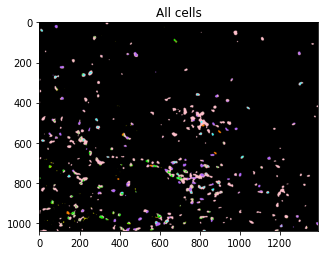

In [18]:
all=I.copy()
N,M,c=all.shape
for i in range(0,N):
  for j in range(0,M):
    if lyau[i,j][0]==0 and lyau[i,j][1]==255 and lyau[i,j][2]==0 :
      all[i,j]=lyau[i,j]=(0, 255, 0) #Lymphocytes auxiliaires #Green 
    elif lycy[i,j][0]==178 and lycy[i,j][1]==102 and lycy[i,j][2]==255 :
      all[i,j]=(178, 102, 255) #Lymphocytes cytotoxiques #Light purple 
    elif macro[i,j][0]==255 and macro[i,j][1]== 255 and macro[i,j][2]==0:
      all[i,j]=(255, 255, 0) #Macrophages #Yellow
    elif lyB[i,j][0]==255 and lyB[i,j][1]== 128 and lyB[i,j][2]==0 :
      all[i,j]=(255, 128, 0) #Lymphocytes B #Orange
    elif lyT[i,j][0]==53 and lyT[i,j][1]==255 and lyT[i,j][2]==255 : 
      all[i,j]=(53, 255, 255) #Lymphocytes T regulateurs  #Light Blue
    elif lydn[i,j][0]==255 and lydn[i,j][1]==192 and lydn[i,j][2]==203 :
      all[i,j]=(255,192,203) #Lymphocytes double négatif #Pink
    else:
      all[i,j]=(0,0,0)


plt.figure(figsize=(5,5))
plt.imshow(all)
plt.title('All cells')
plt.show()

#Analysis 

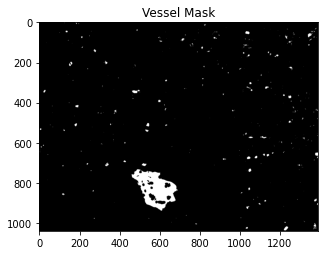

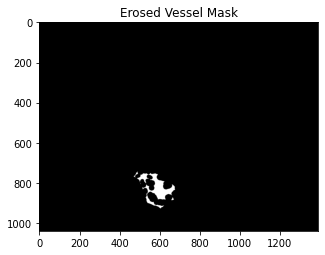

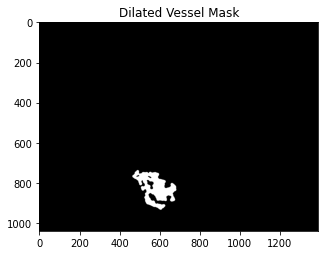

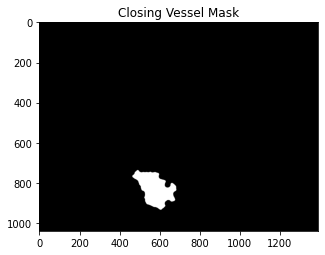

In [19]:
# create a mask based on the threshold for the vessel
t = 0.05
binary_mask1 = Ig < t

plt.figure(figsize=(5,5))
plt.imshow(binary_mask1,cmap="gray")
plt.title('Vessel Mask')
plt.show()

#We compute erosion to eliminate all the white spot in the background
ero1 = morpho.erosion(binary_mask1,strel('disk',8))
plt.figure(figsize=(5,5))
plt.imshow(ero1,cmap="gray")
plt.title('Erosed Vessel Mask')
plt.show()

#Then we do a dilation with a disk  of another size to try to go back to the initial vessel shape
ero2 = morpho.dilation(ero1,strel('disk',7))
plt.figure(figsize=(5,5))
plt.imshow(ero2,cmap="gray")
plt.title('Dilated Vessel Mask')
plt.show()

#Then we do a closing with a disk  of another size to close the holes created inside the vessel
ero3= morpho.closing(ero2,strel('disk',13))
copia=ero3.astype(int)
plt.figure(figsize=(5,5))
plt.imshow(ero3,cmap="gray")
plt.title('Closing Vessel Mask')
plt.show()

In [20]:
#This function take in input the number of iteration n and dil= "ray" of dilation we want to apply
def imagecreation(dil,n):
  lista=[]
  im=copia.copy()
  for i in tqdm(range(0,n+1)):
    if i==0:
       im1=morpho.dilation(im,strel('disk',dil))
    else:
      im=morpho.dilation(im1,strel('disk',dil))
      sott=im-im1
      lista.append(sott)
      im1=im
  sleep(.1)
  return lista

In [21]:
lil=imagecreation(50,20)#13 min to run

100%|██████████| 21/21 [12:41<00:00, 36.27s/it]


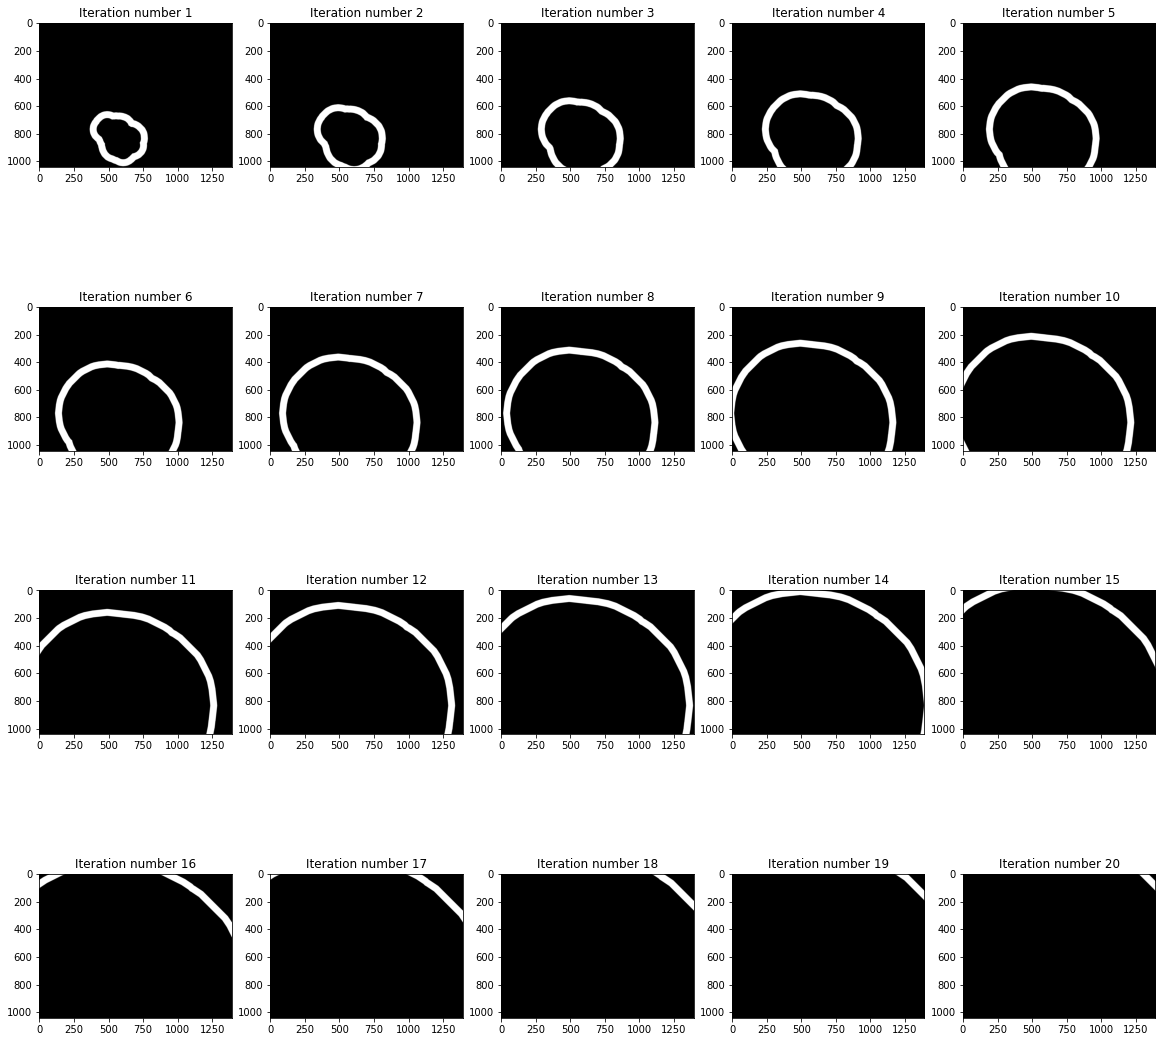

In [22]:
#To compile if you want to see the list of different dilation of the vessel
fig = plt.figure(figsize=(20, 20))
for i in range(0,len(lil)):
    fig.add_subplot(4, 5, i+1)
    plt.title('Iteration number %d' %(i+1))
    plt.imshow(lil[i],cmap='gray')
plt.show()

In [23]:
#With this function we will create an image where only the cells inside the radius previously created are considered
#exp = list with the successive expansion
#cells = list containing all the images of the various types of cells previously classified
#plot = whether the graph is to be displayed
def areaofinterest(exp,cells,plot=False):
  imout=cells.copy()
  for i in range(0,cells.shape[0]):
     for j in range(0,cells.shape[1]):
       if cells[i,j]==1 and exp[i,j]==1:
         imout[i,j]==1
       else:
         imout[i,j]=0
  if plot==True:
    plt.figure(figsize=(4,4))
    plt.imshow(imout,cmap='gray')
    plt.title('Cells in a specific area')
    plt.show()
  return(imout)

In [24]:
#Here we create a list of 6 list with 20 image each, where we have only the cells for each of the 6 classes in the 20 radius
#2 min to run
listaimg=[rgb2gray(lydnbin),rgb2gray(lyaubin),rgb2gray(lycybin),rgb2gray(macrobin),rgb2gray(lyBbin),rgb2gray(lyTbin)]
ris=[]
for j in range(0,len(listaimg)):
  ris1=[]
  for i in range(0,len(lil)):
    rist=areaofinterest(lil[i],listaimg[j])#True= plot, False or nothing= no plot
    ris1.append(rist)
  ris.append(ris1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


In [25]:
#With this function we will save in a list all the coordinates of the centroids of a certan image 
#cell = is the image of which the centroids will be calculated, in this specific case, we are going to use as input image the result of the function "areaofinteres", 
#so we will consider only the area in a specific radius. 
#cntrlist = it's the list where the centroids will be saved
#name is just used to print the correct name in the plot 
#plot = whether the graph is to be displayed,
def propacq(cell,cntrlist,name,plot=False):
  label_img = label(np.flip(np.rot90(cell),0))
  regions = regionprops(label_img)
  cntrlist=[]
  for props in regions:
    #coordlist.append(props.coords)
    cntrlist.append(props.centroid)
  if plot == True:
    plt.figure(figsize=(4,4))
    plt.imshow(cell,cmap='gray')
    for i in range (0,len(cntrlist)):
      plt.scatter(cntrlist[i][0], cntrlist[i][1], marker="x", color="red", s=1)
    plt.title(name)
    plt.show()
  return (cntrlist) 

In [26]:
#here we will create a list of list with all the coordinates of the centroids, particularly we will have a list of 6 elements that will be 6
#list with 20 list inside each of them, in each of the 20 list we will have the coordinates of the centroids that were found. 
#In this specific case, we are going to use as input image the result of the function "areaofinteres", so we will consider only the area in a specific "radius"
cellsname=['Lymphocytes double négatif','Lymphocytes auxiliaires',' Lymphocytes cytotoxiques','Macrophages','Lymphocytes B ','Lymphocytes T regulateurs']
centrlydnbin=[]
centrlyaubin=[]
centrlycybin=[]
centrmacrobin=[]
centrlyBbin=[]
centrlyTbin=[]
centrtot=[centrlydnbin,centrlyaubin,centrlycybin,centrmacrobin,centrlyBbin,centrlyTbin]
for i in range(0,len(ris)):
  for j in range(0,len(ris[i])):
    centrmom=[]
    centrmom=propacq(ris[i][j],centrmom,cellsname[i])#True->Plot, False or nothing->no plot
    centrtot[i].append(centrmom)


In [27]:
#I do the same with the cells of KI67->KI67_8gray
#1)
KI67_8grayris1=[]
KI67_8grayris=[]
for i in range(0,len(lil)):
  KI67_8grayrist=areaofinterest(lil[i],KI67_8gray.astype(float)/255)#True= plot, False or nothing= no plot
  KI67_8grayris.append(KI67_8grayrist)


#2)
centrKI67=[]
for i in range(0,len(KI67_8grayris)):
    centrmom=[]
    centrmom=propacq(KI67_8grayris[i],centrmom,'KI67')#True->Plot, False or nothing->no plot
    centrKI67.append(centrmom)

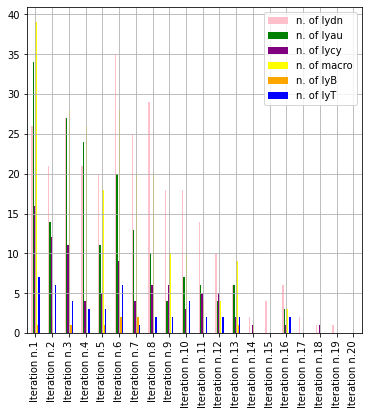

In [28]:
#throught scale it's possible to zoom in and out the image, automatically enlarging and decreasing also the legend and the tickets.
scale=1
plt.rc('figure', figsize=(scale *6, scale *6))

lydnnum = [len(centrtot[0][0]),len(centrtot[0][1]),len(centrtot[0][2]),len(centrtot[0][3]),len(centrtot[0][4]),len(centrtot[0][5]),len(centrtot[0][6]),len(centrtot[0][7]),len(centrtot[0][8]),len(centrtot[0][9]),len(centrtot[0][10]),len(centrtot[0][11]),len(centrtot[0][12]),len(centrtot[0][13]),len(centrtot[0][14]),len(centrtot[0][15]),len(centrtot[0][16]),len(centrtot[0][17]),len(centrtot[0][18]),len(centrtot[0][19])]
lyaunum =  [len(centrtot[1][0]),len(centrtot[1][1]),len(centrtot[1][2]),len(centrtot[1][3]),len(centrtot[1][4]),len(centrtot[1][5]),len(centrtot[1][6]),len(centrtot[1][7]),len(centrtot[1][8]),len(centrtot[1][9]),len(centrtot[1][10]),len(centrtot[1][11]),len(centrtot[1][12]),len(centrtot[1][13]),len(centrtot[1][14]),len(centrtot[1][15]),len(centrtot[1][16]),len(centrtot[1][17]),len(centrtot[1][18]),len(centrtot[1][19])]
lycynum = [len(centrtot[2][0]),len(centrtot[2][1]),len(centrtot[2][2]),len(centrtot[2][3]),len(centrtot[2][4]),len(centrtot[2][5]),len(centrtot[2][6]),len(centrtot[2][7]),len(centrtot[2][8]),len(centrtot[2][9]),len(centrtot[2][10]),len(centrtot[2][11]),len(centrtot[2][12]),len(centrtot[2][13]),len(centrtot[2][14]),len(centrtot[2][15]),len(centrtot[2][16]),len(centrtot[2][17]),len(centrtot[2][18]),len(centrtot[2][19])]
macronum = [len(centrtot[3][0]),len(centrtot[3][3][1]),len(centrtot[3][2]),len(centrtot[3][3]),len(centrtot[3][4]),len(centrtot[3][5]),len(centrtot[3][6]),len(centrtot[3][7]),len(centrtot[3][8]),len(centrtot[3][9]),len(centrtot[3][10]),len(centrtot[3][11]),len(centrtot[3][12]),len(centrtot[3][13]),len(centrtot[3][14]),len(centrtot[3][15]),len(centrtot[3][16]),len(centrtot[3][17]),len(centrtot[3][18]),len(centrtot[3][19])]
lyBnum = [len(centrtot[4][0]),len(centrtot[4][1]),len(centrtot[4][2]),len(centrtot[4][3]),len(centrtot[4][4]),len(centrtot[4][5]),len(centrtot[4][6]),len(centrtot[4][7]),len(centrtot[4][8]),len(centrtot[4][9]),len(centrtot[4][10]),len(centrtot[4][11]),len(centrtot[4][12]),len(centrtot[4][13]),len(centrtot[4][14]),len(centrtot[4][15]),len(centrtot[4][16]),len(centrtot[4][17]),len(centrtot[4][18]),len(centrtot[4][19])]
lyTnum = [len(centrtot[5][0]),len(centrtot[5][1]),len(centrtot[5][2]),len(centrtot[5][3]),len(centrtot[5][4]),len(centrtot[5][5]),len(centrtot[5][6]),len(centrtot[5][7]),len(centrtot[5][8]),len(centrtot[5][9]),len(centrtot[5][10]),len(centrtot[5][11]),len(centrtot[5][12]),len(centrtot[5][13]),len(centrtot[5][14]),len(centrtot[5][15]),len(centrtot[5][16]),len(centrtot[5][17]),len(centrtot[5][18]),len(centrtot[5][19])]
index = ['Iteration n.1', 'Iteration n.2', 'Iteration n.3',
         'Iteration n.4', 'Iteration n.5', 'Iteration n.6', 'Iteration n.7','Iteration n.8','Iteration n.9','Iteration n.10','Iteration n.11','Iteration n.12','Iteration n.13','Iteration n.14','Iteration n.15','Iteration n.16','Iteration n.17','Iteration n.18','Iteration n.19','Iteration n.20']
df = pd.DataFrame({'n. of lydn': lydnnum,
                   'n. of lyau': lyaunum,
                   'n. of lycy': lycynum,
                   'n. of macro': macronum,
                   'n. of lyB': lyBnum,
                   'n. of lyT': lyTnum
                   }, index=index)

ax = df.plot.bar(rot=90,color={"n. of lydn": "pink", "n. of lyau": "green","n. of lycy":"purple","n. of macro":"yellow","n. of lyB":"orange","n. of lyT":"blue"})
ax.legend(fontsize=scale *10)
ax.tick_params(axis='both', which='major', labelsize=scale *10)
ax.grid()

In [29]:
#function to calculate the total numer of cell in a particular ray
def tot_cell_in_a_ray(j):
  sum=0
  for i in range(0,6):
    sum+=(len(centrtot[i][j]))
  if sum==0:
    print('no cells detected')
  return(int(sum))

In [30]:
info = {'Iteration': ['1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'],
        
'% Lymphocytes double négatif': [str( (len(centrtot[0][0])/tot_cell_in_a_ray(0))*100 ),str( (len(centrtot[0][1])/tot_cell_in_a_ray(1))*100 ),str( (len(centrtot[0][2])/tot_cell_in_a_ray(2))*100 ),str( (len(centrtot[0][3])/tot_cell_in_a_ray(3))*100 ),str( (len(centrtot[0][4])/tot_cell_in_a_ray(4))*100 ),str( (len(centrtot[0][5])/tot_cell_in_a_ray(5))*100 ),str( (len(centrtot[0][6])/tot_cell_in_a_ray(6))*100 ),str( (len(centrtot[0][7])/tot_cell_in_a_ray(7))*100 ),str( (len(centrtot[0][8])/tot_cell_in_a_ray(8))*100 ),str( (len(centrtot[0][9])/tot_cell_in_a_ray(9))*100 ),str( (len(centrtot[0][10])/tot_cell_in_a_ray(10))*100 ),str( (len(centrtot[0][11])/tot_cell_in_a_ray(11))*100 ),str( (len(centrtot[0][12])/tot_cell_in_a_ray(12))*100 ),str( (len(centrtot[0][13])/tot_cell_in_a_ray(13))*100 ),str( (len(centrtot[0][14])/tot_cell_in_a_ray(14))*100 ),str( (len(centrtot[0][15])/tot_cell_in_a_ray(15))*100 ),str( (len(centrtot[0][16])/tot_cell_in_a_ray(16))*100 ),str( (len(centrtot[0][17])/tot_cell_in_a_ray(17))*100 ),'No cells','No cells'],
'% Lymphocytes auxiliaires':[str( (len(centrtot[1][0])/tot_cell_in_a_ray(0))*100 ),str( (len(centrtot[1][1])/tot_cell_in_a_ray(1))*100 ),str( (len(centrtot[1][2])/tot_cell_in_a_ray(2))*100 ),str( (len(centrtot[1][3])/tot_cell_in_a_ray(3))*100 ),str( (len(centrtot[1][4])/tot_cell_in_a_ray(4))*100 ),str( (len(centrtot[1][5])/tot_cell_in_a_ray(5))*100 ),str( (len(centrtot[1][6])/tot_cell_in_a_ray(6))*100 ),str( (len(centrtot[1][7])/tot_cell_in_a_ray(7))*100 ),str( (len(centrtot[1][8])/tot_cell_in_a_ray(8))*100 ),str( (len(centrtot[1][9])/tot_cell_in_a_ray(9))*100 ),str( (len(centrtot[1][10])/tot_cell_in_a_ray(10))*100 ),str( (len(centrtot[1][11])/tot_cell_in_a_ray(11))*100 ),str( (len(centrtot[1][12])/tot_cell_in_a_ray(12))*100 ),str( (len(centrtot[1][13])/tot_cell_in_a_ray(13))*100 ),str( (len(centrtot[1][14])/tot_cell_in_a_ray(14))*100 ),str( (len(centrtot[1][15])/tot_cell_in_a_ray(15))*100 ),str( (len(centrtot[1][16])/tot_cell_in_a_ray(16))*100 ),str( (len(centrtot[1][17])/tot_cell_in_a_ray(17))*100 ),'No cells','No cells'],

'% Lymphocytes cytotoxiques':[str( (len(centrtot[2][0])/tot_cell_in_a_ray(0))*100 ),str( (len(centrtot[2][1])/tot_cell_in_a_ray(1))*100 ),str( (len(centrtot[2][2])/tot_cell_in_a_ray(2))*100 ),str( (len(centrtot[2][3])/tot_cell_in_a_ray(3))*100 ),str( (len(centrtot[2][4])/tot_cell_in_a_ray(4))*100 ),str( (len(centrtot[2][5])/tot_cell_in_a_ray(5))*100 ),str( (len(centrtot[2][6])/tot_cell_in_a_ray(6))*100 ),str( (len(centrtot[2][7])/tot_cell_in_a_ray(7))*100 ),str( (len(centrtot[2][8])/tot_cell_in_a_ray(8))*100 ),str( (len(centrtot[2][9])/tot_cell_in_a_ray(9))*100 ),str( (len(centrtot[2][10])/tot_cell_in_a_ray(10))*100 ),str( (len(centrtot[2][11])/tot_cell_in_a_ray(11))*100 ),str( (len(centrtot[2][12])/tot_cell_in_a_ray(12))*100 ),str( (len(centrtot[2][13])/tot_cell_in_a_ray(13))*100 ),str( (len(centrtot[2][14])/tot_cell_in_a_ray(14))*100 ),str( (len(centrtot[2][15])/tot_cell_in_a_ray(15))*100 ),str( (len(centrtot[2][16])/tot_cell_in_a_ray(16))*100 ),str( (len(centrtot[2][17])/tot_cell_in_a_ray(17))*100 ),'No cells','No cells'],
'% Macrophages':[str( (len(centrtot[3][0])/tot_cell_in_a_ray(0))*100 ),str( (len(centrtot[3][1])/tot_cell_in_a_ray(1))*100 ),str( (len(centrtot[3][2])/tot_cell_in_a_ray(2))*100 ),str( (len(centrtot[3][3])/tot_cell_in_a_ray(3))*100 ),str( (len(centrtot[3][4])/tot_cell_in_a_ray(4))*100 ),str( (len(centrtot[3][5])/tot_cell_in_a_ray(5))*100 ),str( (len(centrtot[3][6])/tot_cell_in_a_ray(6))*100 ),str( (len(centrtot[3][7])/tot_cell_in_a_ray(7))*100 ),str( (len(centrtot[3][8])/tot_cell_in_a_ray(8))*100 ),str( (len(centrtot[3][9])/tot_cell_in_a_ray(9))*100 ),str( (len(centrtot[3][10])/tot_cell_in_a_ray(10))*100 ),str( (len(centrtot[3][11])/tot_cell_in_a_ray(11))*100 ),str( (len(centrtot[3][12])/tot_cell_in_a_ray(12))*100 ),str( (len(centrtot[3][13])/tot_cell_in_a_ray(13))*100 ),str( (len(centrtot[3][14])/tot_cell_in_a_ray(14))*100 ),str( (len(centrtot[3][15])/tot_cell_in_a_ray(15))*100 ),str( (len(centrtot[3][16])/tot_cell_in_a_ray(16))*100 ),str( (len(centrtot[3][17])/tot_cell_in_a_ray(17))*100 ),'No cells','No cells'],
'% Lymphocytes B':[str( (len(centrtot[4][0])/tot_cell_in_a_ray(0))*100 ),str( (len(centrtot[4][1])/tot_cell_in_a_ray(1))*100 ),str( (len(centrtot[4][2])/tot_cell_in_a_ray(2))*100 ),str( (len(centrtot[4][3])/tot_cell_in_a_ray(3))*100 ),str( (len(centrtot[4][4])/tot_cell_in_a_ray(4))*100 ),str( (len(centrtot[4][5])/tot_cell_in_a_ray(5))*100 ),str( (len(centrtot[4][6])/tot_cell_in_a_ray(6))*100 ),str( (len(centrtot[4][7])/tot_cell_in_a_ray(7))*100 ),str( (len(centrtot[4][8])/tot_cell_in_a_ray(8))*100 ),str( (len(centrtot[4][9])/tot_cell_in_a_ray(9))*100 ),str( (len(centrtot[4][10])/tot_cell_in_a_ray(10))*100 ),str( (len(centrtot[4][11])/tot_cell_in_a_ray(11))*100 ),str( (len(centrtot[4][12])/tot_cell_in_a_ray(12))*100 ),str( (len(centrtot[4][13])/tot_cell_in_a_ray(13))*100 ),str( (len(centrtot[4][14])/tot_cell_in_a_ray(14))*100 ),str( (len(centrtot[4][15])/tot_cell_in_a_ray(15))*100 ),str( (len(centrtot[4][16])/tot_cell_in_a_ray(16))*100 ),str( (len(centrtot[4][17])/tot_cell_in_a_ray(17))*100 ),'No cells','No cells'],
'% Lymphocytes T':[str( (len(centrtot[5][0])/tot_cell_in_a_ray(0))*100 ),str( (len(centrtot[5][1])/tot_cell_in_a_ray(1))*100 ),str( (len(centrtot[5][2])/tot_cell_in_a_ray(2))*100 ),str( (len(centrtot[5][3])/tot_cell_in_a_ray(3))*100 ),str( (len(centrtot[5][4])/tot_cell_in_a_ray(4))*100 ),str( (len(centrtot[5][5])/tot_cell_in_a_ray(5))*100 ),str( (len(centrtot[5][6])/tot_cell_in_a_ray(6))*100 ),str( (len(centrtot[5][7])/tot_cell_in_a_ray(7))*100 ),str( (len(centrtot[5][8])/tot_cell_in_a_ray(8))*100 ),str( (len(centrtot[5][9])/tot_cell_in_a_ray(9))*100 ),str( (len(centrtot[5][10])/tot_cell_in_a_ray(10))*100 ),str( (len(centrtot[5][11])/tot_cell_in_a_ray(11))*100 ),str( (len(centrtot[5][12])/tot_cell_in_a_ray(12))*100 ),str( (len(centrtot[5][13])/tot_cell_in_a_ray(13))*100 ),str( (len(centrtot[5][14])/tot_cell_in_a_ray(14))*100 ),str( (len(centrtot[5][15])/tot_cell_in_a_ray(15))*100 ),str( (len(centrtot[5][16])/tot_cell_in_a_ray(16))*100 ),str( (len(centrtot[5][17])/tot_cell_in_a_ray(17))*100 ),'No cells','No cells'],
'Tot':['~100','~100','~100','~100','~100','~100','~100','~100','~100','~100','~100','~100','~100','~100','~100','~100','100','100','0','0']
}

print(tabulate(info, headers='keys', tablefmt='fancy_grid'))

╒═════════════╤════════════════════════════════╤═════════════════════════════╤══════════════════════════════╤════════════════════╤════════════════════╤════════════════════╤═══════╕
│   Iteration │ % Lymphocytes double négatif   │ % Lymphocytes auxiliaires   │ % Lymphocytes cytotoxiques   │ % Macrophages      │ % Lymphocytes B    │ % Lymphocytes T    │ Tot   │
╞═════════════╪════════════════════════════════╪═════════════════════════════╪══════════════════════════════╪════════════════════╪════════════════════╪════════════════════╪═══════╡
│           1 │ 21.138211382113823             │ 27.64227642276423           │ 13.008130081300814           │ 31.70731707317073  │ 0.8130081300813009 │ 5.691056910569105  │ ~100  │
├─────────────┼────────────────────────────────┼─────────────────────────────┼──────────────────────────────┼────────────────────┼────────────────────┼────────────────────┼───────┤
│           2 │ 30.0                           │ 20.0                        │ 17.1428571428571

In [31]:
#function to calculare the euclidian distance between centroids
def distances_calculator(value1,value2,iteration):
  distanze=[]
  for i in (centrtot[value1][iteration]): 
    for j in (centrtot[value2][iteration]):
      distanze.append(euclidean_distances([[i[0],i[1]]],[[j[0],j[1]]]))
  return(distanze)

In [32]:
#val1 is the class of the cell whose distance from all other cells is to be calculated. 
# for this reason if we gave 0, in num.remove(val1) we will only consider the other classe, and calculate the euclidian distance between class of val1 and the other classes
#iteration is the radius of which we want to study the distances between cells
def distances_total(val1,iteration):
  num=[0,1 ,2 ,3 ,4 ,5]
  num.remove(val1)
  list1=distances_calculator(val1,num[0],iteration)
  list2=distances_calculator(val1,num[1],iteration)
  list3=distances_calculator(val1,num[2],iteration)
  list4=distances_calculator(val1,num[3],iteration)
  list5=distances_calculator(val1,num[4],iteration)
  mean1=np.mean(list1)
  mean2=np.mean(list2)
  mean3=np.mean(list3)
  mean4=np.mean(list4)
  mean5=np.mean(list5)
  var1=np.var(list1)
  var2=np.var(list2)
  var3=np.var(list3)
  var4=np.var(list4)
  var5=np.var(list5)
  return(list1,list2,list3,list4,list5,mean1,mean2,mean3,mean4,mean5,var1,var2,var3,var4,var5)

In [33]:
#we use the function for all the classe in iteration 0, so in the closest zone with respect to the vessel
distdnau0, distdncy0, distdnmacro0, distdnB0, distdnT0, meandnau0, meandncy0,meandnmacro0,meandnB0, meandnT0,vardnau0, vardncy0, vardnmacro0, vardnB0, vardnT0 = distances_total(0,0)
distaudn0, distaucy0, distdaumacro0, distauB0, distauT0, meanaudn0, meanaucy0,meanaumacro0,meanauB0, meanauT0,varaudn0, varaucy0, varaumacro0, varauB0, varauT0 = distances_total(1,0)
distcydn0, distcyau0, distcyumacro0, distcyB0, distcyT0, meancydn0, meancyau0,meancymacro0,meancyB0, meancyT0,varcydn0, varcyau0, varcymacro0, varcyB0, varcyT0 = distances_total(2,0)
distmacrodn0, distmacroau0, distdmacrocy0, distmacroB0, distmacroT0, meanmacrodn0, meanmacroau0,meanmacrocy0,meanmacroB0, meanmacroT0,varmacrodn0, varmacroau0, varmacrocy0, varmacroB0, varmacroT0 = distances_total(3,0)
distBdn0, distBau0, distBcy0, distBmacro, distBT0, meanBdn0, meanBau0,meanBcy0,meanBmacro0, meanBT0,varBdn0, varBau0, varBcy0, varBmacro0, varBT0 = distances_total(4,0)
distTdn0, distTau0, distTcy0, distTmacro0, distTB, meanTdn0, meanTau0,meanTcy0,meanTmacro0, meanTB0,varTdn0, varTau0, varTcy0, varTmacro0, varTB0 = distances_total(5,0)


In [34]:
info = {'Mean Values at Iteration 0': ['Lymphocytes double négatif ', ' Lymphocytes auxiliaires', ' Lymphocytes cytotoxiques','Macrophages','Lymphocytes B','Lymphocytes T'],
        
'Lymphocytes double négatif': [0,meanaudn0,meancydn0,meanmacrodn0,meanBdn0,meanTdn0],
'Lymphocytes auxiliaires':[meandnau0,0,meancyau0,meanmacroau0,meanBau0,meanTau0],
'Lymphocytes cytotoxiques':[meandncy0,meanaucy0,0,meanmacrocy0,meanBcy0,meanTcy0],
'Macrophages':[meandnmacro0,meanaumacro0,meancymacro0,0,meanBmacro0,meanTmacro0],
'Lymphocytes B':[meandnB0,meanauB0,meancyB0,meanmacroB0,0,meanTB0],
'Lymphocytes T':[meandnT0,meanauT0,meancyB0,meanmacroT0,meanBT0,0]
}

print(tabulate(info, headers='keys', tablefmt='fancy_grid'))


info = {'Var Values at Iteration 0': ['Lymphocytes double négatif ', ' Lymphocytes auxiliaires', ' Lymphocytes cytotoxiques','Macrophages','Lymphocytes B','Lymphocytes T'],
        
'Lymphocytes double négatif': [0,varaudn0,varcydn0,varmacrodn0,varBdn0,varTdn0],
'Lymphocytes auxiliaires':[vardnau0,0,varcyau0,varmacroau0,varBau0,varTau0],
'Lymphocytes cytotoxiques':[vardncy0,varaucy0,0,varmacrocy0,varBcy0,varTcy0],
'Macrophages':[vardnmacro0,varaumacro0,varcymacro0,0,varBmacro0,varTmacro0],
'Lymphocytes B':[vardnB0,varauB0,varcyB0,varmacroB0,0,varTB0],
'Lymphocytes T':[vardnT0,varauT0,varcyB0,varmacroT0,varBT0,0]
}

print(tabulate(info, headers='keys', tablefmt='fancy_grid'))

╒══════════════════════════════╤══════════════════════════════╤═══════════════════════════╤════════════════════════════╤═══════════════╤═════════════════╤═════════════════╕
│ Mean Values at Iteration 0   │   Lymphocytes double négatif │   Lymphocytes auxiliaires │   Lymphocytes cytotoxiques │   Macrophages │   Lymphocytes B │   Lymphocytes T │
╞══════════════════════════════╪══════════════════════════════╪═══════════════════════════╪════════════════════════════╪═══════════════╪═════════════════╪═════════════════╡
│ Lymphocytes double négatif   │                        0     │                   196.555 │                    207.626 │       202.217 │         250.018 │         207.373 │
├──────────────────────────────┼──────────────────────────────┼───────────────────────────┼────────────────────────────┼───────────────┼─────────────────┼─────────────────┤
│ Lymphocytes auxiliaires      │                      196.555 │                     0     │                    177.614 │       170.911 

In [35]:
#Calculating density of the cells in each ray
totalcells=0
for i in range(0,20):
  totalcells+=tot_cell_in_a_ray(i)

info = {'Iteration': ['% of cells wrt the total number '],
        
'1': [(tot_cell_in_a_ray(0)/totalcells)*100],
'2': [(tot_cell_in_a_ray(1)/totalcells)*100],
'3': [(tot_cell_in_a_ray(2)/totalcells)*100],
'4': [(tot_cell_in_a_ray(3)/totalcells)*100],
'5': [(tot_cell_in_a_ray(4)/totalcells)*100],
'6': [(tot_cell_in_a_ray(5)/totalcells)*100],
'7': [(tot_cell_in_a_ray(6)/totalcells)*100],
'8': [(tot_cell_in_a_ray(7)/totalcells)*100],
'9': [(tot_cell_in_a_ray(8)/totalcells)*100],
'10':[(tot_cell_in_a_ray(9)/totalcells)*100],
'11':[(tot_cell_in_a_ray(10)/totalcells)*100],
'12':[(tot_cell_in_a_ray(11)/totalcells)*100],
'13':[(tot_cell_in_a_ray(12)/totalcells)*100],
'14':[(tot_cell_in_a_ray(13)/totalcells)*100],
'15':[(tot_cell_in_a_ray(14)/totalcells)*100],
'16':[(tot_cell_in_a_ray(15)/totalcells)*100],
'17':[(tot_cell_in_a_ray(16)/totalcells)*100],
'18':[(tot_cell_in_a_ray(17)/totalcells)*100],
'19':[(tot_cell_in_a_ray(18)/totalcells)*100],
'20':[(tot_cell_in_a_ray(19)/totalcells)*100],
}

print(tabulate(info, headers='keys', tablefmt='fancy_grid'))

#Calculating density of marker KI67 in each ray
totcentrKI67=0
for i in range(0,len(lil)):
  totcentrKI67+=len(centrKI67[i])

info = {'Iteration': ['% of cells activated by marker KI67 wrt the total number '],
        
'1': [(len(centrKI67[0])/totcentrKI67)*100],
'2': [(len(centrKI67[1])/totcentrKI67)*100],
'3': [(len(centrKI67[2])/totcentrKI67)*100],
'4': [(len(centrKI67[3])/totcentrKI67)*100],
'5': [(len(centrKI67[4])/totcentrKI67)*100],
'6': [(len(centrKI67[5])/totcentrKI67)*100],
'7': [(len(centrKI67[6])/totcentrKI67)*100],
'8': [(len(centrKI67[7])/totcentrKI67)*100],
'9': [(len(centrKI67[8])/totcentrKI67)*100],
'10':[(len(centrKI67[9])/totcentrKI67)*100],
'11':[(len(centrKI67[10])/totcentrKI67)*100],
'12':[(len(centrKI67[11])/totcentrKI67)*100],
'13':[(len(centrKI67[12])/totcentrKI67)*100],
'14':[(len(centrKI67[13])/totcentrKI67)*100],
'15':[(len(centrKI67[14])/totcentrKI67)*100],
'16':[(len(centrKI67[15])/totcentrKI67)*100],
'17':[(len(centrKI67[16])/totcentrKI67)*100],
'18':[(len(centrKI67[17])/totcentrKI67)*100],
'19':[(len(centrKI67[18])/totcentrKI67)*100],
'20':[(len(centrKI67[19])/totcentrKI67)*100],
}

print(tabulate(info, headers='keys', tablefmt='fancy_grid'))
x=tabulate(info, headers='keys', tablefmt='fancy_grid')


no cells detected
no cells detected
╒═════════════════════════════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤══════════╤══════════╤═════════╤══════════╤══════════╤══════════╤══════╕
│ Iteration                       │       1 │       2 │       3 │       4 │       5 │       6 │       7 │       8 │       9 │      10 │      11 │      12 │      13 │       14 │       15 │      16 │       17 │       18 │       19 │   20 │
╞═════════════════════════════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪══════════╪══════════╪═════════╪══════════╪══════════╪══════════╪══════╡
│ % of cells wrt the total number │ 14.4536 │ 8.22562 │ 11.5159 │ 9.16569 │ 6.81551 │ 11.7509 │ 7.63807 │ 7.87309 │ 4.70035 │ 4.93537 │ 3.64277 │ 2.93772 │ 3.05523 │ 0.470035 │ 0.470035 │ 1.76263 │ 0.235018 │ 0.235018 │ 0.117509 │    0 │
╘═══════════

In [36]:
#Calculation of te total number of cell
y=[]
x=[]
for i in range(0,20):
  y.append((tot_cell_in_a_ray(i)/totalcells)*100)
  x.append(i+1)

no cells detected


In [37]:
#Calculation of te total number of cell activated by KI67
yK=[]
xK=[]
for i in range(0,20):
  yK.append((len(centrKI67[i])/totcentrKI67)*100)
  xK.append(i+1)

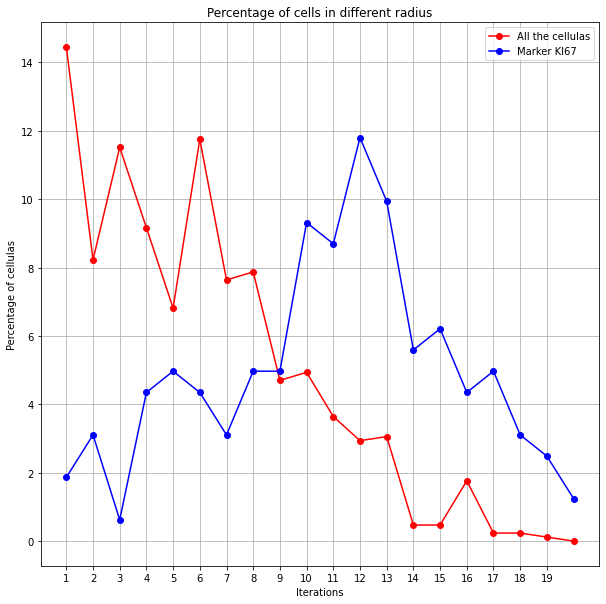

In [38]:
plt.figure(figsize=(10,10))
plt.plot(x,y , marker = "o", color = 'red') 
plt.plot(xK,yK , marker = "o", color = 'blue') 
plt.title("Percentage of cells in different radius") 
plt.grid()
plt.xticks(np.arange(1, 20, step=1))
plt.legend(['All the cellulas', 'Marker KI67'])
plt.xlabel("Iterations")
plt.ylabel("Percentage of cellulas")
plt.show()

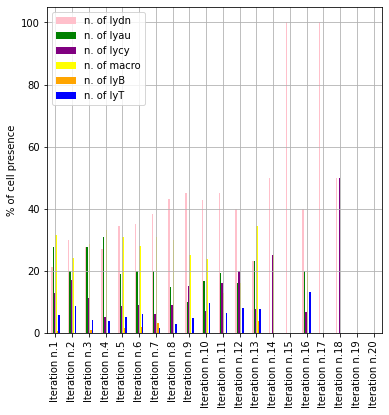

In [39]:
#throught scale it's possible to zoom in and out the image, automatically enlarging and decreasing also the legend and the tickets.
scale=1
plt.rc('figure', figsize=(scale *6, scale *6))
     
lydnnum= [( (len(centrtot[0][0])/tot_cell_in_a_ray(0))*100 ),( (len(centrtot[0][1])/tot_cell_in_a_ray(1))*100 ),( (len(centrtot[0][2])/tot_cell_in_a_ray(2))*100 ),( (len(centrtot[0][3])/tot_cell_in_a_ray(3))*100 ),( (len(centrtot[0][4])/tot_cell_in_a_ray(4))*100 ),( (len(centrtot[0][5])/tot_cell_in_a_ray(5))*100 ),( (len(centrtot[0][6])/tot_cell_in_a_ray(6))*100 ),( (len(centrtot[0][7])/tot_cell_in_a_ray(7))*100 ),( (len(centrtot[0][8])/tot_cell_in_a_ray(8))*100 ),( (len(centrtot[0][9])/tot_cell_in_a_ray(9))*100 ),( (len(centrtot[0][10])/tot_cell_in_a_ray(10))*100 ),( (len(centrtot[0][11])/tot_cell_in_a_ray(11))*100 ),( (len(centrtot[0][12])/tot_cell_in_a_ray(12))*100 ),( (len(centrtot[0][13])/tot_cell_in_a_ray(13))*100 ),( (len(centrtot[0][14])/tot_cell_in_a_ray(14))*100 ),( (len(centrtot[0][15])/tot_cell_in_a_ray(15))*100 ),( (len(centrtot[0][16])/tot_cell_in_a_ray(16))*100 ),( (len(centrtot[0][17])/tot_cell_in_a_ray(17))*100 ),0,0]
lyaunum=[( (len(centrtot[1][0])/tot_cell_in_a_ray(0))*100 ),( (len(centrtot[1][1])/tot_cell_in_a_ray(1))*100 ),( (len(centrtot[1][2])/tot_cell_in_a_ray(2))*100 ),( (len(centrtot[1][3])/tot_cell_in_a_ray(3))*100 ),( (len(centrtot[1][4])/tot_cell_in_a_ray(4))*100 ),( (len(centrtot[1][5])/tot_cell_in_a_ray(5))*100 ),( (len(centrtot[1][6])/tot_cell_in_a_ray(6))*100 ),( (len(centrtot[1][7])/tot_cell_in_a_ray(7))*100 ),( (len(centrtot[1][8])/tot_cell_in_a_ray(8))*100 ),( (len(centrtot[1][9])/tot_cell_in_a_ray(9))*100 ),( (len(centrtot[1][10])/tot_cell_in_a_ray(10))*100 ),( (len(centrtot[1][11])/tot_cell_in_a_ray(11))*100 ),( (len(centrtot[1][12])/tot_cell_in_a_ray(12))*100 ),( (len(centrtot[1][13])/tot_cell_in_a_ray(13))*100 ),( (len(centrtot[1][14])/tot_cell_in_a_ray(14))*100 ),( (len(centrtot[1][15])/tot_cell_in_a_ray(15))*100 ),( (len(centrtot[1][16])/tot_cell_in_a_ray(16))*100 ),( (len(centrtot[1][17])/tot_cell_in_a_ray(17))*100 ),0,0]
lycynum=[( (len(centrtot[2][0])/tot_cell_in_a_ray(0))*100 ),( (len(centrtot[2][1])/tot_cell_in_a_ray(1))*100 ),( (len(centrtot[2][2])/tot_cell_in_a_ray(2))*100 ),( (len(centrtot[2][3])/tot_cell_in_a_ray(3))*100 ),( (len(centrtot[2][4])/tot_cell_in_a_ray(4))*100 ),( (len(centrtot[2][5])/tot_cell_in_a_ray(5))*100 ),( (len(centrtot[2][6])/tot_cell_in_a_ray(6))*100 ),( (len(centrtot[2][7])/tot_cell_in_a_ray(7))*100 ),( (len(centrtot[2][8])/tot_cell_in_a_ray(8))*100 ),( (len(centrtot[2][9])/tot_cell_in_a_ray(9))*100 ),( (len(centrtot[2][10])/tot_cell_in_a_ray(10))*100 ),( (len(centrtot[2][11])/tot_cell_in_a_ray(11))*100 ),( (len(centrtot[2][12])/tot_cell_in_a_ray(12))*100 ),( (len(centrtot[2][13])/tot_cell_in_a_ray(13))*100 ),( (len(centrtot[2][14])/tot_cell_in_a_ray(14))*100 ),( (len(centrtot[2][15])/tot_cell_in_a_ray(15))*100 ),( (len(centrtot[2][16])/tot_cell_in_a_ray(16))*100 ),( (len(centrtot[2][17])/tot_cell_in_a_ray(17))*100 ),0,0]
macronum=[( (len(centrtot[3][0])/tot_cell_in_a_ray(0))*100 ),( (len(centrtot[3][1])/tot_cell_in_a_ray(1))*100 ),( (len(centrtot[3][2])/tot_cell_in_a_ray(2))*100 ),( (len(centrtot[3][3])/tot_cell_in_a_ray(3))*100 ),( (len(centrtot[3][4])/tot_cell_in_a_ray(4))*100 ),( (len(centrtot[3][5])/tot_cell_in_a_ray(5))*100 ),( (len(centrtot[3][6])/tot_cell_in_a_ray(6))*100 ),( (len(centrtot[3][7])/tot_cell_in_a_ray(7))*100 ),( (len(centrtot[3][8])/tot_cell_in_a_ray(8))*100 ),( (len(centrtot[3][9])/tot_cell_in_a_ray(9))*100 ),( (len(centrtot[3][10])/tot_cell_in_a_ray(10))*100 ),( (len(centrtot[3][11])/tot_cell_in_a_ray(11))*100 ),( (len(centrtot[3][12])/tot_cell_in_a_ray(12))*100 ),( (len(centrtot[3][13])/tot_cell_in_a_ray(13))*100 ),( (len(centrtot[3][14])/tot_cell_in_a_ray(14))*100 ),( (len(centrtot[3][15])/tot_cell_in_a_ray(15))*100 ),( (len(centrtot[3][16])/tot_cell_in_a_ray(16))*100 ),( (len(centrtot[3][17])/tot_cell_in_a_ray(17))*100 ),0,0]
lyBnum=[( (len(centrtot[4][0])/tot_cell_in_a_ray(0))*100 ),( (len(centrtot[4][1])/tot_cell_in_a_ray(1))*100 ),( (len(centrtot[4][2])/tot_cell_in_a_ray(2))*100 ),( (len(centrtot[4][3])/tot_cell_in_a_ray(3))*100 ),( (len(centrtot[4][4])/tot_cell_in_a_ray(4))*100 ),( (len(centrtot[4][5])/tot_cell_in_a_ray(5))*100 ),( (len(centrtot[4][6])/tot_cell_in_a_ray(6))*100 ),( (len(centrtot[4][7])/tot_cell_in_a_ray(7))*100 ),( (len(centrtot[4][8])/tot_cell_in_a_ray(8))*100 ),( (len(centrtot[4][9])/tot_cell_in_a_ray(9))*100 ),( (len(centrtot[4][10])/tot_cell_in_a_ray(10))*100 ),( (len(centrtot[4][11])/tot_cell_in_a_ray(11))*100 ),( (len(centrtot[4][12])/tot_cell_in_a_ray(12))*100 ),( (len(centrtot[4][13])/tot_cell_in_a_ray(13))*100 ),( (len(centrtot[4][14])/tot_cell_in_a_ray(14))*100 ),( (len(centrtot[4][15])/tot_cell_in_a_ray(15))*100 ),( (len(centrtot[4][16])/tot_cell_in_a_ray(16))*100 ),( (len(centrtot[4][17])/tot_cell_in_a_ray(17))*100 ),0,0]
lyTnum=[( (len(centrtot[5][0])/tot_cell_in_a_ray(0))*100 ),( (len(centrtot[5][1])/tot_cell_in_a_ray(1))*100 ),( (len(centrtot[5][2])/tot_cell_in_a_ray(2))*100 ),( (len(centrtot[5][3])/tot_cell_in_a_ray(3))*100 ),( (len(centrtot[5][4])/tot_cell_in_a_ray(4))*100 ),( (len(centrtot[5][5])/tot_cell_in_a_ray(5))*100 ),( (len(centrtot[5][6])/tot_cell_in_a_ray(6))*100 ),( (len(centrtot[5][7])/tot_cell_in_a_ray(7))*100 ),( (len(centrtot[5][8])/tot_cell_in_a_ray(8))*100 ),( (len(centrtot[5][9])/tot_cell_in_a_ray(9))*100 ),( (len(centrtot[5][10])/tot_cell_in_a_ray(10))*100 ),( (len(centrtot[5][11])/tot_cell_in_a_ray(11))*100 ),( (len(centrtot[5][12])/tot_cell_in_a_ray(12))*100 ),( (len(centrtot[5][13])/tot_cell_in_a_ray(13))*100 ),( (len(centrtot[5][14])/tot_cell_in_a_ray(14))*100 ),( (len(centrtot[5][15])/tot_cell_in_a_ray(15))*100 ),( (len(centrtot[5][16])/tot_cell_in_a_ray(16))*100 ),( (len(centrtot[5][17])/tot_cell_in_a_ray(17))*100 ),0,0]
index = ['Iteration n.1', 'Iteration n.2', 'Iteration n.3',
         'Iteration n.4', 'Iteration n.5', 'Iteration n.6', 'Iteration n.7','Iteration n.8','Iteration n.9','Iteration n.10','Iteration n.11','Iteration n.12','Iteration n.13','Iteration n.14','Iteration n.15','Iteration n.16','Iteration n.17','Iteration n.18','Iteration n.19','Iteration n.20']
df = pd.DataFrame({'n. of lydn': lydnnum,
                   'n. of lyau': lyaunum,
                   'n. of lycy': lycynum,
                   'n. of macro': macronum,
                   'n. of lyB': lyBnum,
                   'n. of lyT': lyTnum
                   }, index=index)



ax = df.plot.bar(rot=90,color={"n. of lydn": "pink", "n. of lyau": "green","n. of lycy":"purple","n. of macro":"yellow","n. of lyB":"orange","n. of lyT":"blue"})
ax.legend(fontsize=scale *10)
ax.tick_params(axis='both', which='major', labelsize=scale *10)
ax.set_ylabel('% of cell presence')
ax.grid()

#Checks 
I did a comparison between the marker that we have and the number of centroid we obtain, to see the correctness of the approach and to evaluate the difference betweem CD4 and CD8 that are fundamental markers for predicting the development of glycoma .
Another function "checker" is defined to count the number of marker in the images provided by the doctors, this way i was able to do a quick comparison between the results.

In [40]:
def checker(image,name,plot='False'):
  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
      if (image[i,j])!=0 and (image[i,j])!=1: 
        image[i,j]=1
      else:
        image[i,j]=0
  if plot=='True':      
    plt.figure(figsize=(5,5))
    plt.imshow(CD4marker,cmap='gray')
    plt.show()
  lista=[]
  lista=propacq(image,lista,name,plot)  
  value=len(lista)
  return(lista,value)

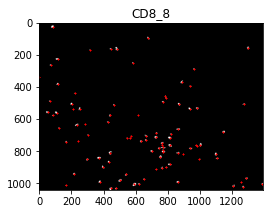

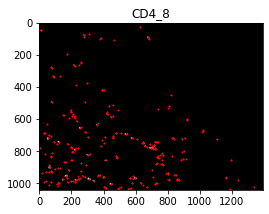

In [41]:
#I used the previously defined function "propacq" to calculate the centroids
CD8_8graycentr=[]
CD8_8graycentr=propacq(CD8_8gray,CD8_8graycentr,'CD8_8',True)
CD4_8graycentr=[]
CD4_8graycentr=propacq(CD4_8gray,CD4_8graycentr,'CD4_8',True)

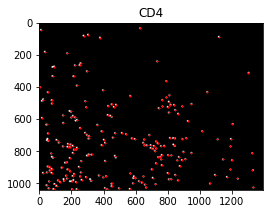

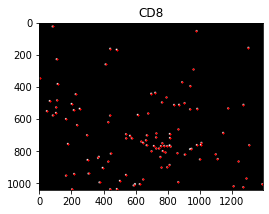

In [42]:
CD4marker=plt.imread('20EN01467_8_phenotype_map CD4.tif')
CD8marker=plt.imread('20EN01467_8_phenotype_map CD8.tif')
realCD4_8graycentr,lenCD4marker=checker(rgb2gray(CD4marker),'CD4',True)
realCD8_8graycentr,lenCD8marker=checker(rgb2gray(CD8marker),'CD8',True)

In [43]:
print('Estimated cells number CD8: ',len(CD8_8graycentr))
print('Real cells number CD8: ',lenCD8marker)
print('Estimated cells number CD4: ',len(CD4_8graycentr))
print('Real cells number CD4: ',lenCD4marker)

Estimated cells number CD8:  94
Real cells number CD8:  104
Estimated cells number CD4:  242
Real cells number CD4:  207
